In [5]:
from numpy import *

In [60]:
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    # return 1.0 / (1 + exp(-inX))
    # 优化方法（RuntimeWarning: overflow encountered in exp）
    if inX >= 0:
        return 1.0 / (1 + exp(-inX))
    else:
        return exp(inX) / (1 + exp(inX))

# 梯度上升算法
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()  # 转置为列向量
    
    m, n = shape(dataMatrix)  # 获取行、列
    alpha = 0.001
    maxCycles = 500  # 迭代500次
    weights = ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)  # 误差
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

In [24]:
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr, labelMat)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [43]:
def plotBestFit(wei):
    import matplotlib.pyplot as plt
    weights = wei.getA()  # 将numpy.mat转换为array类型
    
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    
    n = shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    
    x = arange(-3.0, 3.0, 0.1)  # numpy.arange函数用于创建等差数组
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

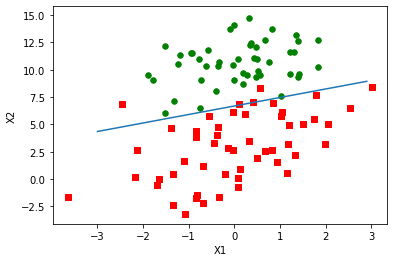

In [44]:
plotBestFit(weights)

## 训练算法

In [45]:
# 随机梯度上升算法
def stocGradAscent0(dataMatrix, classLabels):
    m, n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [46]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr), labelMat)
weights

array([ 1.01702007,  0.85914348, -0.36579921])

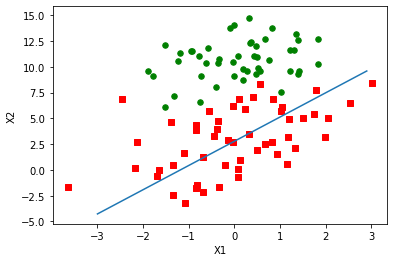

In [49]:
plotBestFit(mat(weights).transpose())

In [55]:
# 改进的随机梯度上升算法
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del dataIndex[randIndex]
    return weights

In [56]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(array(dataArr), labelMat)
weights

array([14.59078724,  1.01204098, -2.07184784])

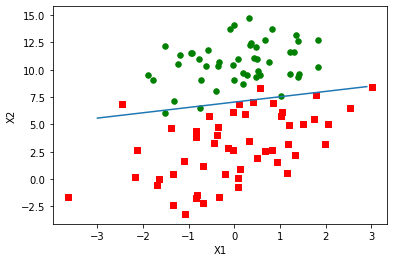

In [57]:
plotBestFit(mat(weights).transpose())

## 实例 从疝气病预测病马的死亡率

In [58]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
    
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
        
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
            
    errorRate = float(errorCount) / numTestVec
    print('the error rate of this test is: %f' % errorRate)
    return errorRate

def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print('after %d iterations the average error rate is: %f' % 
          (numTests, errorSum / float(numTests)))

In [61]:
multiTest()

the error rate of this test is: 0.388060
the error rate of this test is: 0.402985
the error rate of this test is: 0.388060
the error rate of this test is: 0.358209
the error rate of this test is: 0.402985
the error rate of this test is: 0.388060
the error rate of this test is: 0.388060
the error rate of this test is: 0.417910
the error rate of this test is: 0.268657
the error rate of this test is: 0.343284
after 10 iterations the average error rate is: 0.374627
